In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
import time
from PIL import Image

from tensorflow import keras
from tensorflow.keras.preprocessing import image
print(tf.__version__)

2.1.0


## tf.nn.conv2d

In [17]:
img = image.load_img("D:/image/yx.jpg")
r, g, b = img.split()
im = image.img_to_array(b)

In [18]:
input   = tf.constant([im],shape=[1,100,100,1])

In [19]:
kernel = tf.constant([
        [
            [1.0],  [2.0], [1.0],
            [0.0],  [0.0], [0.0],
            [-1.0], [-2.0],[-1.0]

        ]
    ],shape=[3,3,1,1])
conv2d = tf.nn.conv2d(input, kernel, strides=[1, 1, 1, 1], padding='SAME')

In [20]:
np1 = conv2d.numpy()

In [21]:
np2 = np1[0,:,:,0]
np2.shape

(100, 100)

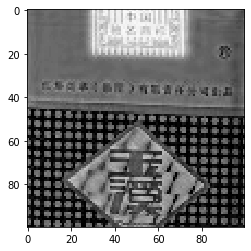

In [22]:
plt.imshow(r, cmap='Greys')

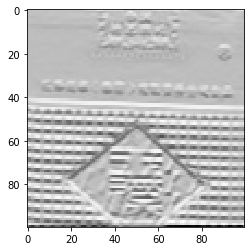

In [23]:
plt.imshow(np2, cmap='Greys')

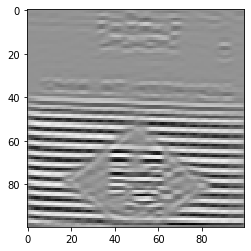

In [24]:
conv2d1 = tf.nn.conv2d(conv2d, kernel, strides=[1, 1, 1, 1], padding='SAME')
conv2d2 = tf.nn.conv2d(conv2d1, kernel, strides=[1, 1, 1, 1], padding='SAME')
conv2d3 = tf.nn.conv2d(conv2d2, kernel, strides=[1, 1, 1, 1], padding='SAME')
l4 = conv2d3.numpy()[0,:,:,0]
plt.imshow(l4, cmap='Greys')

## tf.keras.layers.Conv2D

In [2]:
img = image.load_img("D:/image/yx.jpg")
im = image.img_to_array(img)
im = np.expand_dims(im, axis=0)
im.shape

(1, 100, 100, 3)

In [3]:
conv = tf.keras.layers.Conv2D(filters=3,kernel_size=3,strides=(1,1),padding='same')
output = conv(im)

In [10]:
conv.bias

<tf.Variable 'conv2d/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

In [6]:
help(conv)

Help on Conv2D in module tensorflow.python.keras.layers.convolutional object:

class Conv2D(Conv)
 |  Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True,
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  When using this layer as the first layer in a model,
 |  provide the keyword argument `input_shape`
 |  (tuple of integers, does not include the sample axis),
 |  e.g. `input_shape=(128, 128, 3)` for 128

In [4]:
output

<tf.Tensor: shape=(1, 100, 100, 3), dtype=float32, numpy=
array([[[[  61.70579  ,  176.92935  ,  -59.956894 ],
         [  87.56442  ,  206.1251   ,   37.76771  ],
         [  86.62624  ,  211.99484  ,   36.05083  ],
         ...,
         [ 101.06096  ,  197.44371  ,   18.479498 ],
         [ 104.83223  ,  196.54662  ,   14.488762 ],
         [  90.935936 ,   92.65648  ,   75.63402  ]],

        [[  72.65063  ,  251.2406   ,  -71.17225  ],
         [  49.34532  ,  303.4967   ,   23.700388 ],
         [  45.796223 ,  313.95877  ,   20.465282 ],
         ...,
         [  58.86033  ,  330.63113  ,   -4.8668346],
         [  76.48657  ,  332.75348  ,   -2.961334 ],
         [ 107.5373   ,  132.54901  ,   75.85974  ]],

        [[  70.111595 ,  252.91873  ,  -75.21625  ],
         [  49.434246 ,  306.6978   ,   21.544113 ],
         [  46.074406 ,  316.29324  ,   18.288399 ],
         ...,
         [  71.88667  ,  334.18414  ,   -4.6449137],
         [  80.07176  ,  323.78802  ,   -1.53171

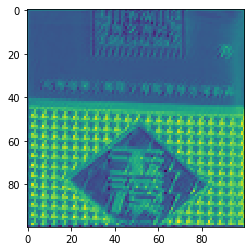

In [5]:
plt.imshow(output[0,:,:,0])

tf.nn.conv2d

In [42]:
sample   = tf.constant([
        [  
            [[1.0], [2.0], [3.0]],
            [[4.0], [5.0], [6.0]],
            [[7.0], [8.0], [9.0]]
        ]
    ],shape=[1,3,3,1])
value = tf.nn.conv2d(sample, kernel, strides=[1, 1, 1, 1], padding='SAME')
value.numpy()[0,:,:,0]

array([[-13., -20., -17.],
       [-18., -24., -18.],
       [ 13.,  20.,  17.]], dtype=float32)

In [132]:
sample   = tf.constant([
        [  
            [[1.0], [2.0], [3.0]],
            [[4.0], [5.0], [6.0]],
            [[7.0], [8.0], [9.0]]
        ],
    [  
            [[1.0], [2.0], [3.0]],
            [[4.0], [5.0], [6.0]],
            [[7.0], [8.0], [9.0]]
        ],
    [  
            [[1.0], [2.0], [3.0]],
            [[4.0], [5.0], [6.0]],
            [[7.0], [8.0], [9.0]]
        ]
    ],shape=[1,3,3,3])
value = tf.nn.conv2d(sample, kernel, strides=[1, 1, 1, 1], padding='SAME')
value.numpy()[0,:,:,0]

array([[-40., -48.,  40.],
       [-60., -72.,  60.],
       [-40., -48.,  40.]], dtype=float32)

In [141]:
kernel.numpy().shape

(3, 3, 3, 1)

In [139]:
k = tf.constant([
        [
            [1.0],  [2.0], [1.0],
            [0.0],  [0.0], [0.0],
            [-1.0], [-2.0],[-1.0]

        ],
    [
            [1.0],  [2.0], [1.0],
            [0.0],  [0.0], [0.0],
            [-1.0], [-2.0],[-1.0]

        ],
    [
            [1.0],  [2.0], [1.0],
            [0.0],  [0.0], [0.0],
            [-1.0], [-2.0],[-1.0]

        ]
    ],shape=[3,3,3])
k1 = tf.expand_dims(k, axis=3)
k1.numpy().shape

(3, 3, 3, 1)

## tf.keras.layers.Conv2D

### 非定义权重

In [70]:
sample   = tf.constant([
        [  
            [[1.0], [2.0], [3.0]],
            [[4.0], [5.0], [6.0]],
            [[7.0], [8.0], [9.0]]
        ]
    ],shape=[1,3,3,1])
value = tf.keras.layers.Conv2D(filters=1,kernel_size=3,strides=(1,1),padding='same')(sample)
value.numpy()

array([[[[ 0.9140318 ],
         [ 1.0805904 ],
         [-0.98877215]],

        [[ 0.39754844],
         [ 0.6345083 ],
         [-1.8166602 ]],

        [[-1.1482286 ],
         [-1.0278435 ],
         [-3.404425  ]]]], dtype=float32)

###  自定义权重

In [203]:
from keras import backend as K
def kernel_init(shape, dtype=None):
    b = K.constant([[1.0],  [2.0], [1.0],
            [0.0],  [0.0], [0.0],
            [-1.0], [-2.0],[-1.0]],shape=[3,3,1,1])
    return b

In [204]:
sample   = tf.constant([
        [  
            [[1.0], [2.0], [3.0]],
            [[4.0], [5.0], [6.0]],
            [[7.0], [8.0], [9.0]]
        ]
    ],shape=[1,3,3,1])
value = tf.keras.layers.Conv2D(filters=1,kernel_size=3,strides=(1,1),padding='same',kernel_initializer=kernel_init)(sample)
value.numpy()

array([[[[-13.],
         [-20.],
         [-17.]],

        [[-18.],
         [-24.],
         [-18.]],

        [[ 13.],
         [ 20.],
         [ 17.]]]], dtype=float32)

### 卷积后计算

In [303]:
img = image.load_img("D:/image/yx.jpg") #yx0为加工过的图片，3个通道值相同
r, g, b = img.split()
im = image.img_to_array(img)
im

array([[[164.,  15.,   9.],
        [165.,  12.,   7.],
        [169.,   9.,   9.],
        ...,
        [175.,  28.,  36.],
        [188.,  43.,  50.],
        [195.,  50.,  57.]],

       [[163.,  14.,   8.],
        [163.,  11.,   6.],
        [168.,   8.,   8.],
        ...,
        [191.,  46.,  53.],
        [200.,  56.,  65.],
        [194.,  51.,  57.]],

       [[170.,  22.,  18.],
        [169.,  17.,  14.],
        [172.,  14.,  15.],
        ...,
        [192.,  51.,  59.],
        [195.,  55.,  64.],
        [190.,  51.,  58.]],

       ...,

       [[173., 113., 105.],
        [155.,  98.,  89.],
        [255., 203., 195.],
        ...,
        [254., 216., 207.],
        [186., 144., 132.],
        [156., 112.,  99.]],

       [[157.,  99.,  88.],
        [187., 133., 123.],
        [255., 213., 204.],
        ...,
        [247., 223., 213.],
        [240., 212., 201.],
        [156., 126., 115.]],

       [[255., 198., 187.],
        [251., 197., 185.],
        [255., 2

In [304]:
im = np.expand_dims(im, axis=0)

In [305]:
from keras import backend as K

def kernel_init(shape, dtype=None):
    b = K.constant([[[ 1.,  1.,  1.],
        [ 2.,  2.,  2.],
        [ 1.,  1.,  1.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[-1., -1., -1.],
        [-2., -2., -2.],
        [-1., -1., -1.]]],shape=[3,3,3,1])
    return b

In [306]:
conv = tf.keras.layers.Conv2D(filters=1,kernel_size=3,strides=(1,1),padding='same',kernel_initializer=kernel_init)
output = conv(im)

In [307]:
output.numpy()[0,:,:,0]

array([[ -550.,  -729.,  -737., ..., -1149., -1234.,  -925.],
       [  -60.,   -68.,   -57., ...,  -210.,  -126.,   -27.],
       [  -48.,   -42.,   -22., ...,  -121.,   -19.,    15.],
       ...,
       [   82.,    82.,   222., ...,  -147.,  -223.,  -195.],
       [ -789.,  -850.,  -592., ...,  -403.,  -671.,  -817.],
       [ 1131.,  1902.,  2153., ...,  2618.,  2386.,  1447.]],
      dtype=float32)

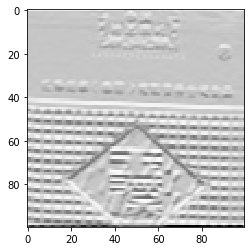

In [308]:
plt.imshow(output.numpy()[0,:,:,0], cmap='Greys')